In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import math
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('airlines_delay.csv')

In [3]:
df 

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [4]:
print(df.shape)

(539382, 8)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB
None


In [6]:
df['Flight'] = df['Flight'].astype('category')

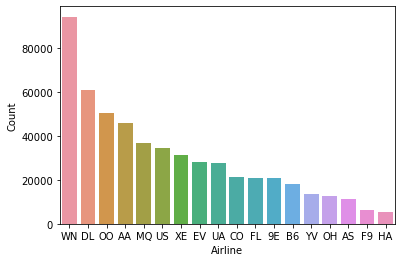

In [7]:
# Creating barplot for airline:
sns.countplot(x='Airline', data=df, order=df['Airline'].value_counts().index)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

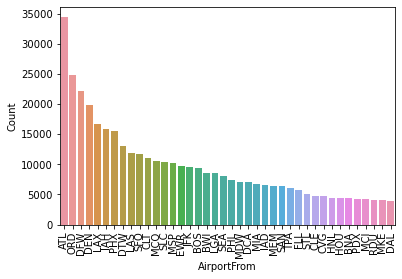

In [8]:
# Displaying the top 40 airports:
top_airports_from = df['AirportFrom'].value_counts().head(40).index
sns.countplot(x='AirportFrom', data=df, order=top_airports_from)
plt.xlabel('AirportFrom')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

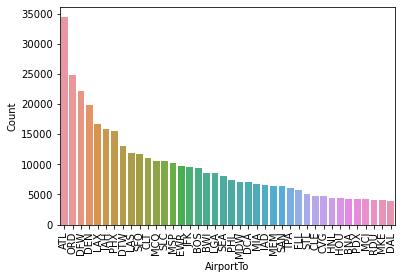

In [9]:
# Displaying the top 40 airportsto:
top_airports_to = df['AirportTo'].value_counts().head(40).index
sns.countplot(x='AirportTo', data=df, order=top_airports_to)
plt.xlabel('AirportTo')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# The top airportsfrom and airportsto are the same.

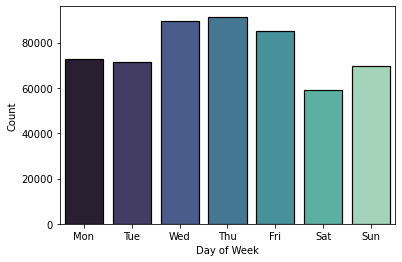

In [10]:
# Distribution of flights by dayoftheweek:

sns.countplot(x='DayOfWeek', data=df, order=[1, 2, 3, 4, 5, 6, 7], 
              palette='mako', 
              saturation=0.7, 
              edgecolor='black',
              linewidth=1.2,
              )
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

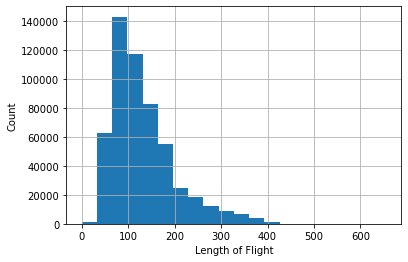

In [11]:
# length of the flights:
df['Length'].hist(bins=20)
plt.xlabel('Length of Flight')
plt.ylabel('Count')
plt.show()

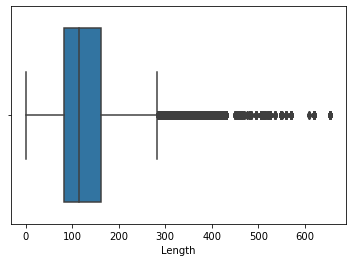

In [12]:
sns.boxplot(x='Length', data=df)
plt.xlabel('Length')
plt.show()

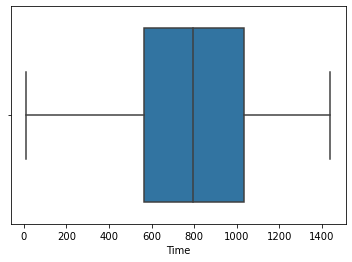

In [13]:
sns.boxplot(x='Time', data=df)
plt.xlabel('Time')
plt.show()

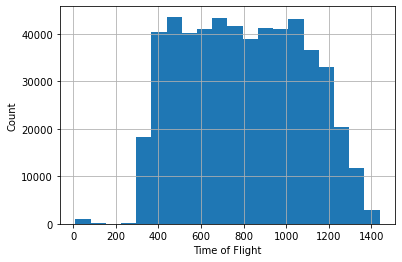

In [14]:
df['Time'].hist(bins=20)
plt.xlabel('Time of Flight')
plt.ylabel('Count')
plt.show()

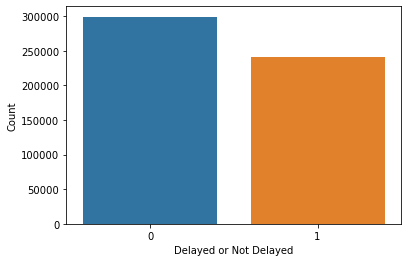

In [15]:
sns.countplot(x='Class', data=df)
plt.xlabel('Delayed or Not Delayed')
plt.ylabel('Count')
plt.show()

# Class shows the data is quite balanced

In [16]:
count_flights = df['Airline'].value_counts()

# Group data by airline and calculate the percentage of delayed flights
delayed_percent = df.groupby('Airline')['Class'].mean() * 100

# Combine the two Series objects into a DataFrame
result = pd.concat([count_flights, delayed_percent], axis=1)
result.columns = ['Total Flights', 'Percent Delayed']

# Sort the DataFrame by the percentage of delayed flights (in descending order)
result = result.sort_values('Percent Delayed', ascending=False)

# Print the result
print(result)

    Total Flights  Percent Delayed
WN          94097        69.775870
CO          21118        56.619945
B6          18112        46.703843
OO          50254        45.289927
DL          60940        45.047588
F9           6456        44.903965
EV          27983        40.220848
9E          20686        39.766025
AA          45656        38.847030
XE          31126        37.894365
MQ          36604        34.810403
AS          11471        33.929038
US          34500        33.597101
UA          27619        32.390746
HA           5578        32.018645
FL          20827        30.129159
OH          12630        27.727633
YV          13725        24.291439


Text(0.5, 1.0, 'Count of Flights by Airline and Class')

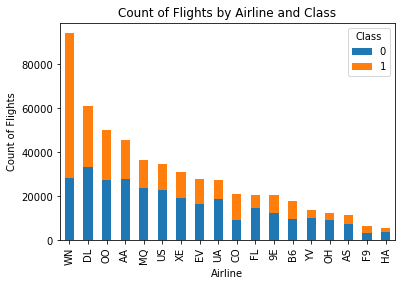

In [17]:
grouped = df.groupby(['Airline', 'Class'])['Flight'].count().unstack()

totals = grouped.sum(axis=1)
grouped = grouped.loc[totals.sort_values(ascending=False).index]
# Create a stacked bar plot of the grouped data
ax = grouped.plot(kind='bar', stacked=True)

# Set the axis labels and title
ax.set_xlabel('Airline')
ax.set_ylabel('Count of Flights')
ax.set_title('Count of Flights by Airline and Class')

Text(0.5, 1.0, 'Count of Flights by AirportFrom and Class')

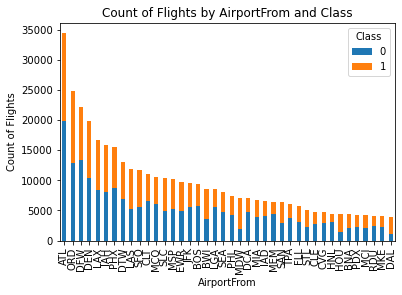

In [18]:
grouped = df.groupby(['AirportFrom', 'Class'])['Flight'].count().unstack()

totals = grouped.sum(axis=1)
top40 = totals.sort_values(ascending=False)[:40]
grouped = grouped.loc[top40.index]
# Create a stacked bar plot of the grouped data
ax = grouped.plot(kind='bar', stacked=True)

# Set the axis labels and title
ax.set_xlabel('AirportFrom')
ax.set_ylabel('Count of Flights')
ax.set_title('Count of Flights by AirportFrom and Class')

In [19]:
# Preprocessing the data: we will encode the categorical variables "Airline", "AirportFrom", "AirportTo"
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to categorical variables
flight_encoded = le.fit_transform(df['Flight'])
airline_encoded = le.fit_transform(df['Airline'])
airport_from_encoded = le.fit_transform(df['AirportFrom'])
airport_to_encoded = le.fit_transform(df['AirportTo'])

# Replace original columns with encoded columns
df['Flight'] = flight_encoded
df['Airline'] = airline_encoded
df['AirportFrom'] = airport_from_encoded
df['AirportTo'] = airport_to_encoded

In [20]:
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2308,1296.0,141.0,5,16,129,1,0
1,6198,360.0,146.0,12,65,208,4,0
2,1243,1170.0,143.0,3,35,60,3,0
3,29,1410.0,344.0,14,203,217,6,0
4,561,692.0,98.0,8,32,16,4,0
...,...,...,...,...,...,...,...,...
539377,6223,530.0,72.0,12,111,252,5,1
539378,1260,560.0,115.0,15,153,79,4,1
539379,5004,827.0,74.0,6,47,16,2,1
539380,605,715.0,65.0,15,45,43,4,1


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  int64  
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  int64  
 4   AirportFrom  539382 non-null  int64  
 5   AirportTo    539382 non-null  int64  
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 32.9 MB
None


In [22]:
x_variables = ["Flight","Time", "Airline", "AirportFrom", "AirportTo", "DayOfWeek"]
y = ["Class"]

In [23]:
# Split and Train the data:
x_train, x_test, y_train, y_test = train_test_split(df[x_variables], df[y], test_size=0.20)

## Running a Logistic Regression Model

In [24]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
model.intercept_

array([-1.12151839])

In [26]:
model.coef_

array([[-5.99657172e-05,  1.01894909e-03,  2.38827057e-02,
         1.92923189e-04,  7.67529393e-04, -3.42483887e-02]])

In [27]:
## Function to plot the confusion matrix
def confusion_matrix_(test, predictions):
    cm = confusion_matrix(test, predictions)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

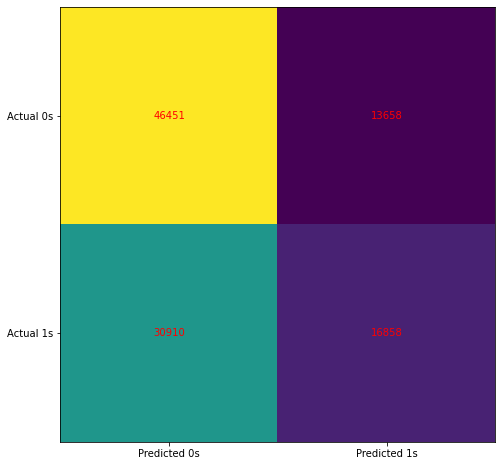

In [28]:
## Plotting the confusion matrix
confusion_matrix_(y_test, model.predict(x_test))

In [29]:
# Make predictions on the testing data
y_pred_logit = model.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_logit)
print("Accuracy:", accuracy)

Accuracy: 0.5868628159848717


In [30]:
from sklearn.metrics import classification_report

# Compute precision, recall, and F1 score for each class
report_logit = classification_report(y_test, y_pred_logit)
print(report_logit)

              precision    recall  f1-score   support

           0       0.60      0.77      0.68     60109
           1       0.55      0.35      0.43     47768

    accuracy                           0.59    107877
   macro avg       0.58      0.56      0.55    107877
weighted avg       0.58      0.59      0.57    107877



## Decision Tree Model

In [31]:
# Let's Run a Decision Tree to predict whether the flights will be delayed or not:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree classifier object
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6116317658073547


In [32]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 14.50
|   |--- feature_1 <= 551.50
|   |   |--- feature_1 <= 431.50
|   |   |   |--- feature_1 <= 285.00
|   |   |   |   |--- feature_1 <= 46.50
|   |   |   |   |   |--- feature_3 <= 153.50
|   |   |   |   |   |   |--- feature_0 <= 1643.00
|   |   |   |   |   |   |   |--- feature_1 <= 35.00
|   |   |   |   |   |   |   |   |--- feature_5 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 715.00
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 234.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  234.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_0 >  715.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  3.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 46.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 25.00
|   |   |   |  

In [33]:
# The accuracy score of 0.610 means that the decision tree model correctly predicted the class of the test data 61.0% 
# of the time. In other words, out of all the test data samples, 61.0% of them were classified correctly by the model.

# Since the data is quite balanced as we saw from the class plot earlier and since we are predicting whether flights will 
# be delayed, accuracy is a good metric to look at as we're interested in seeing how well is our model predicting delayed
# flights.

In [34]:
from sklearn.metrics import classification_report

# Compute precision, recall, and F1 score for each class
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.72      0.67     60109
           1       0.57      0.47      0.52     47768

    accuracy                           0.61    107877
   macro avg       0.60      0.60      0.60    107877
weighted avg       0.61      0.61      0.61    107877



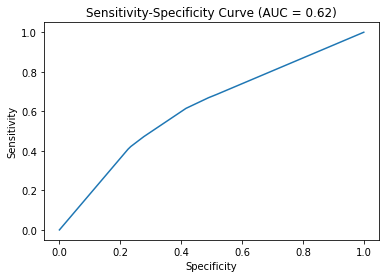

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Compute sensitivity and specificity for different thresholds
sensitivity = tpr
specificity = fpr

# Plot sensitivity-specificity curve
plt.plot(specificity, sensitivity)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Sensitivity-Specificity Curve (AUC = %0.2f)' % roc_auc)
plt.show()

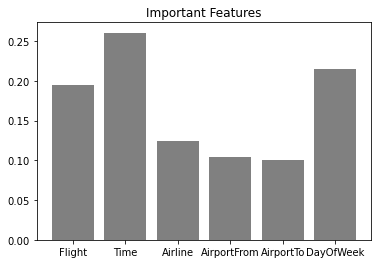

In [36]:
# Important Features

plt.title("Important Features")
plt.bar(range(len(x_variables)), clf.feature_importances_, color="grey")
plt.xticks(range(len(x_variables)), x_variables)
plt.show()

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

<ipython-input-37-91513dc11b60>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [38]:
y_pred_rf = rf.predict(x_test)

In [39]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.6192330153786256


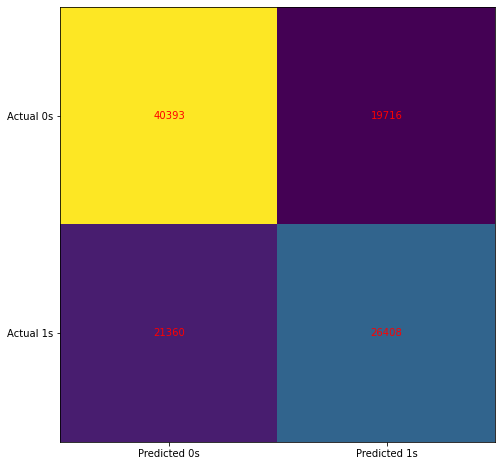

In [40]:
confusion_matrix_(y_test, y_pred_rf)

In [41]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.65      0.67      0.66     60109
           1       0.57      0.55      0.56     47768

    accuracy                           0.62    107877
   macro avg       0.61      0.61      0.61    107877
weighted avg       0.62      0.62      0.62    107877



# XGBoost 

In [42]:
pip install xgboost


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
y_pred_xgb = xgb_classifier.predict(x_test)

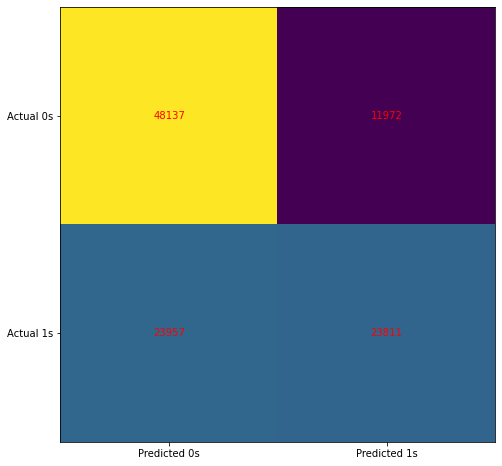

In [45]:
confusion_matrix_(y_test,y_pred_xgb)

In [46]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.6669447611631766


In [47]:
report_xgb = classification_report(y_test, y_pred_xgb)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.67      0.80      0.73     60109
           1       0.67      0.50      0.57     47768

    accuracy                           0.67    107877
   macro avg       0.67      0.65      0.65    107877
weighted avg       0.67      0.67      0.66    107877

